In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import LocalOutlierFactor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [170]:
df = pd.read_table("abalone.data", sep=",",header=None)
df.columns=['sex','length','diameter','height','whole_wt','shucked_wt','viscera_wt','shell_wt','rings']
df

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [171]:
# Converting categorical data to numerical using dummies :
df=pd.get_dummies(df,columns=['sex'])
df

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [172]:
# Removing outliers:

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))  
threshold = 3
np.where(z > threshold)
df1 = df[(z < 3).all(axis=1)]    
df1

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [173]:
#check for nulls:
df.isnull().sum()

# check for datatypes:
df.dtypes

# Observing target variable diversity:
df['rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [174]:
df.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,sex_F,sex_I,sex_M
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,0.312904,0.321283,0.365813
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.463731,0.467025,0.481715
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000,1.000000


In [175]:
df.dtypes

length        float64
diameter      float64
height        float64
whole_wt      float64
shucked_wt    float64
viscera_wt    float64
shell_wt      float64
rings           int64
sex_F           uint8
sex_I           uint8
sex_M           uint8
dtype: object

In [176]:
# Changing datatypes
df['sex_F']=df['sex_F'].astype('int64')
df['sex_M']=df['sex_F'].astype('int64')
df['sex_I']=df['sex_F'].astype('int64')

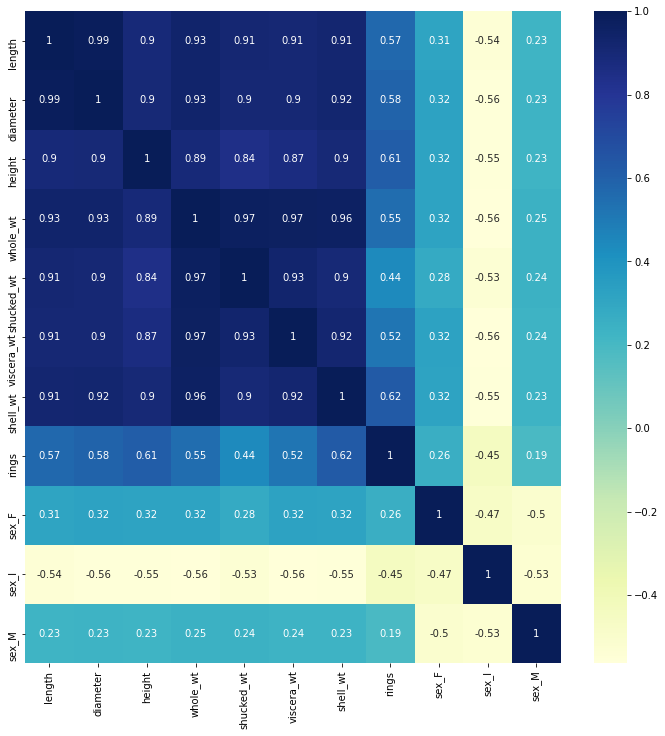

In [84]:
fig,ax = plt.subplots(figsize=(12, 12))   
sns.heatmap(df1.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [5]:
X = df1.drop(['rings'], axis=1)
y = df1['rings'].ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [6]:
sc=StandardScaler()
sc=sc.fit_transform(X_train)

#### 2.Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

In [7]:
temp = DecisionTreeRegressor(random_state=24)
temp = temp.fit(X_train,y_train)
pred1=temp.predict(X_test)

In [8]:
r2_score(y_test, pred1)

0.15652496776094305

In [9]:
rmse = np.sqrt(MSE(y_test, pred1))
print("RMSE : % f" %(rmse))

RMSE :  2.624648


#### Tuning decision tree :

In [10]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [11]:
from sklearn.model_selection import GridSearchCV

hp_dt=DecisionTreeRegressor(random_state=24)

params_dt = {'max_depth': [3, 4,5, 6],
              'max_features': [1,2,3,4,5,6,7,8,9,10],
              'min_samples_leaf': [0.1, 0.2,0.3]
            }
grid_dt = GridSearchCV(estimator=hp_dt,                        
                       param_grid=params_dt,                       
                       cv=10,                       
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=24), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [0.1, 0.2, 0.3]})

In [12]:
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 0.1}


In [13]:
best_model = grid_dt.best_estimator_
# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)
# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.429


####  Using best parameters on Decission Tree:

In [29]:
temp = DecisionTreeRegressor(max_depth=4,max_features=10,min_impurity_decrease=0,min_samples_leaf=0.1,random_state=24)
temp = temp.fit(X_train,y_train)
pred1=temp.predict(X_test)
r2_score(y_test, pred1)

0.42861135997157906

In [30]:
rmse = np.sqrt(MSE(y_test, pred1))
print("RMSE : % f" %(rmse))

RMSE :  2.160234


#### 3.Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

In [16]:
from sklearn.ensemble import RandomForestRegressor
rc=RandomForestRegressor(random_state=24)
rc.fit(X_train,y_train)
y_pred=rc.predict(X_test)

In [17]:
r2_score(y_test, y_pred)

0.5463699110829907

In [18]:
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  1.924801


#### Tuning Random Forest Regressor:

In [19]:
rf = RandomForestRegressor(random_state= 24)

In [22]:
params_rf = {'n_estimators': [300, 400, 500],
             'max_features': ['log2', 'sqrt'],
             'max_depth': [4, 6, 8],
             'min_samples_leaf': [0.1, 0.2, 0.3]}

grid_rf = GridSearchCV(estimator=rf,                       
                       param_grid=params_rf,                        
                       cv=3,                       
                       verbose=1,                       
                       n_jobs=-1)
                       

In [23]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=24), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2, 0.3],
                         'n_estimators': [300, 400, 500]},
             verbose=1)

In [24]:
best_hyperparams = grid_rf.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 500}


In [25]:
best_model = grid_rf.best_estimator_

y_pred = best_model.predict(X_test)

rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 2.27


#### After tuning hyper parameter it is observedt that the default parameters gives maximum rmse value.

#### 4.Create an xgboost model tuned to the best of your abilities. Explain how you tuned it. 

In [56]:
model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.4952465476066804

#### Tuning Xgboost:

In [57]:
rf =  XGBRegressor(random_state= 24)

In [62]:
params_rf = {'n_estimators': [300, 400, 500],
             'max_depth': [4, 6, 8]}

grid_rf = GridSearchCV(estimator=rf,                       
                       param_grid=params_rf,                        
                       cv=3,                       
                       verbose=1,                       
                       n_jobs=-1)

In [63]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=24,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [64]:
best_hyperparams = grid_rf.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 8, 'n_estimators': 300}


#### Fitting best xgboost regression parameters:

In [65]:
model = XGBRegressor(max_depth=8, n_estimators=300)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.48567606762893445

#### After tuning hyper parameter it is observedt that the default parameters gives maximum rmse value.

#### 5.Which model performed best? What is your performance metric? Why?

#### When performed regression using decission tree,random forest and xgboost max performance achieved is 54%.  Therefore trying to understand the distributions for all the variables.

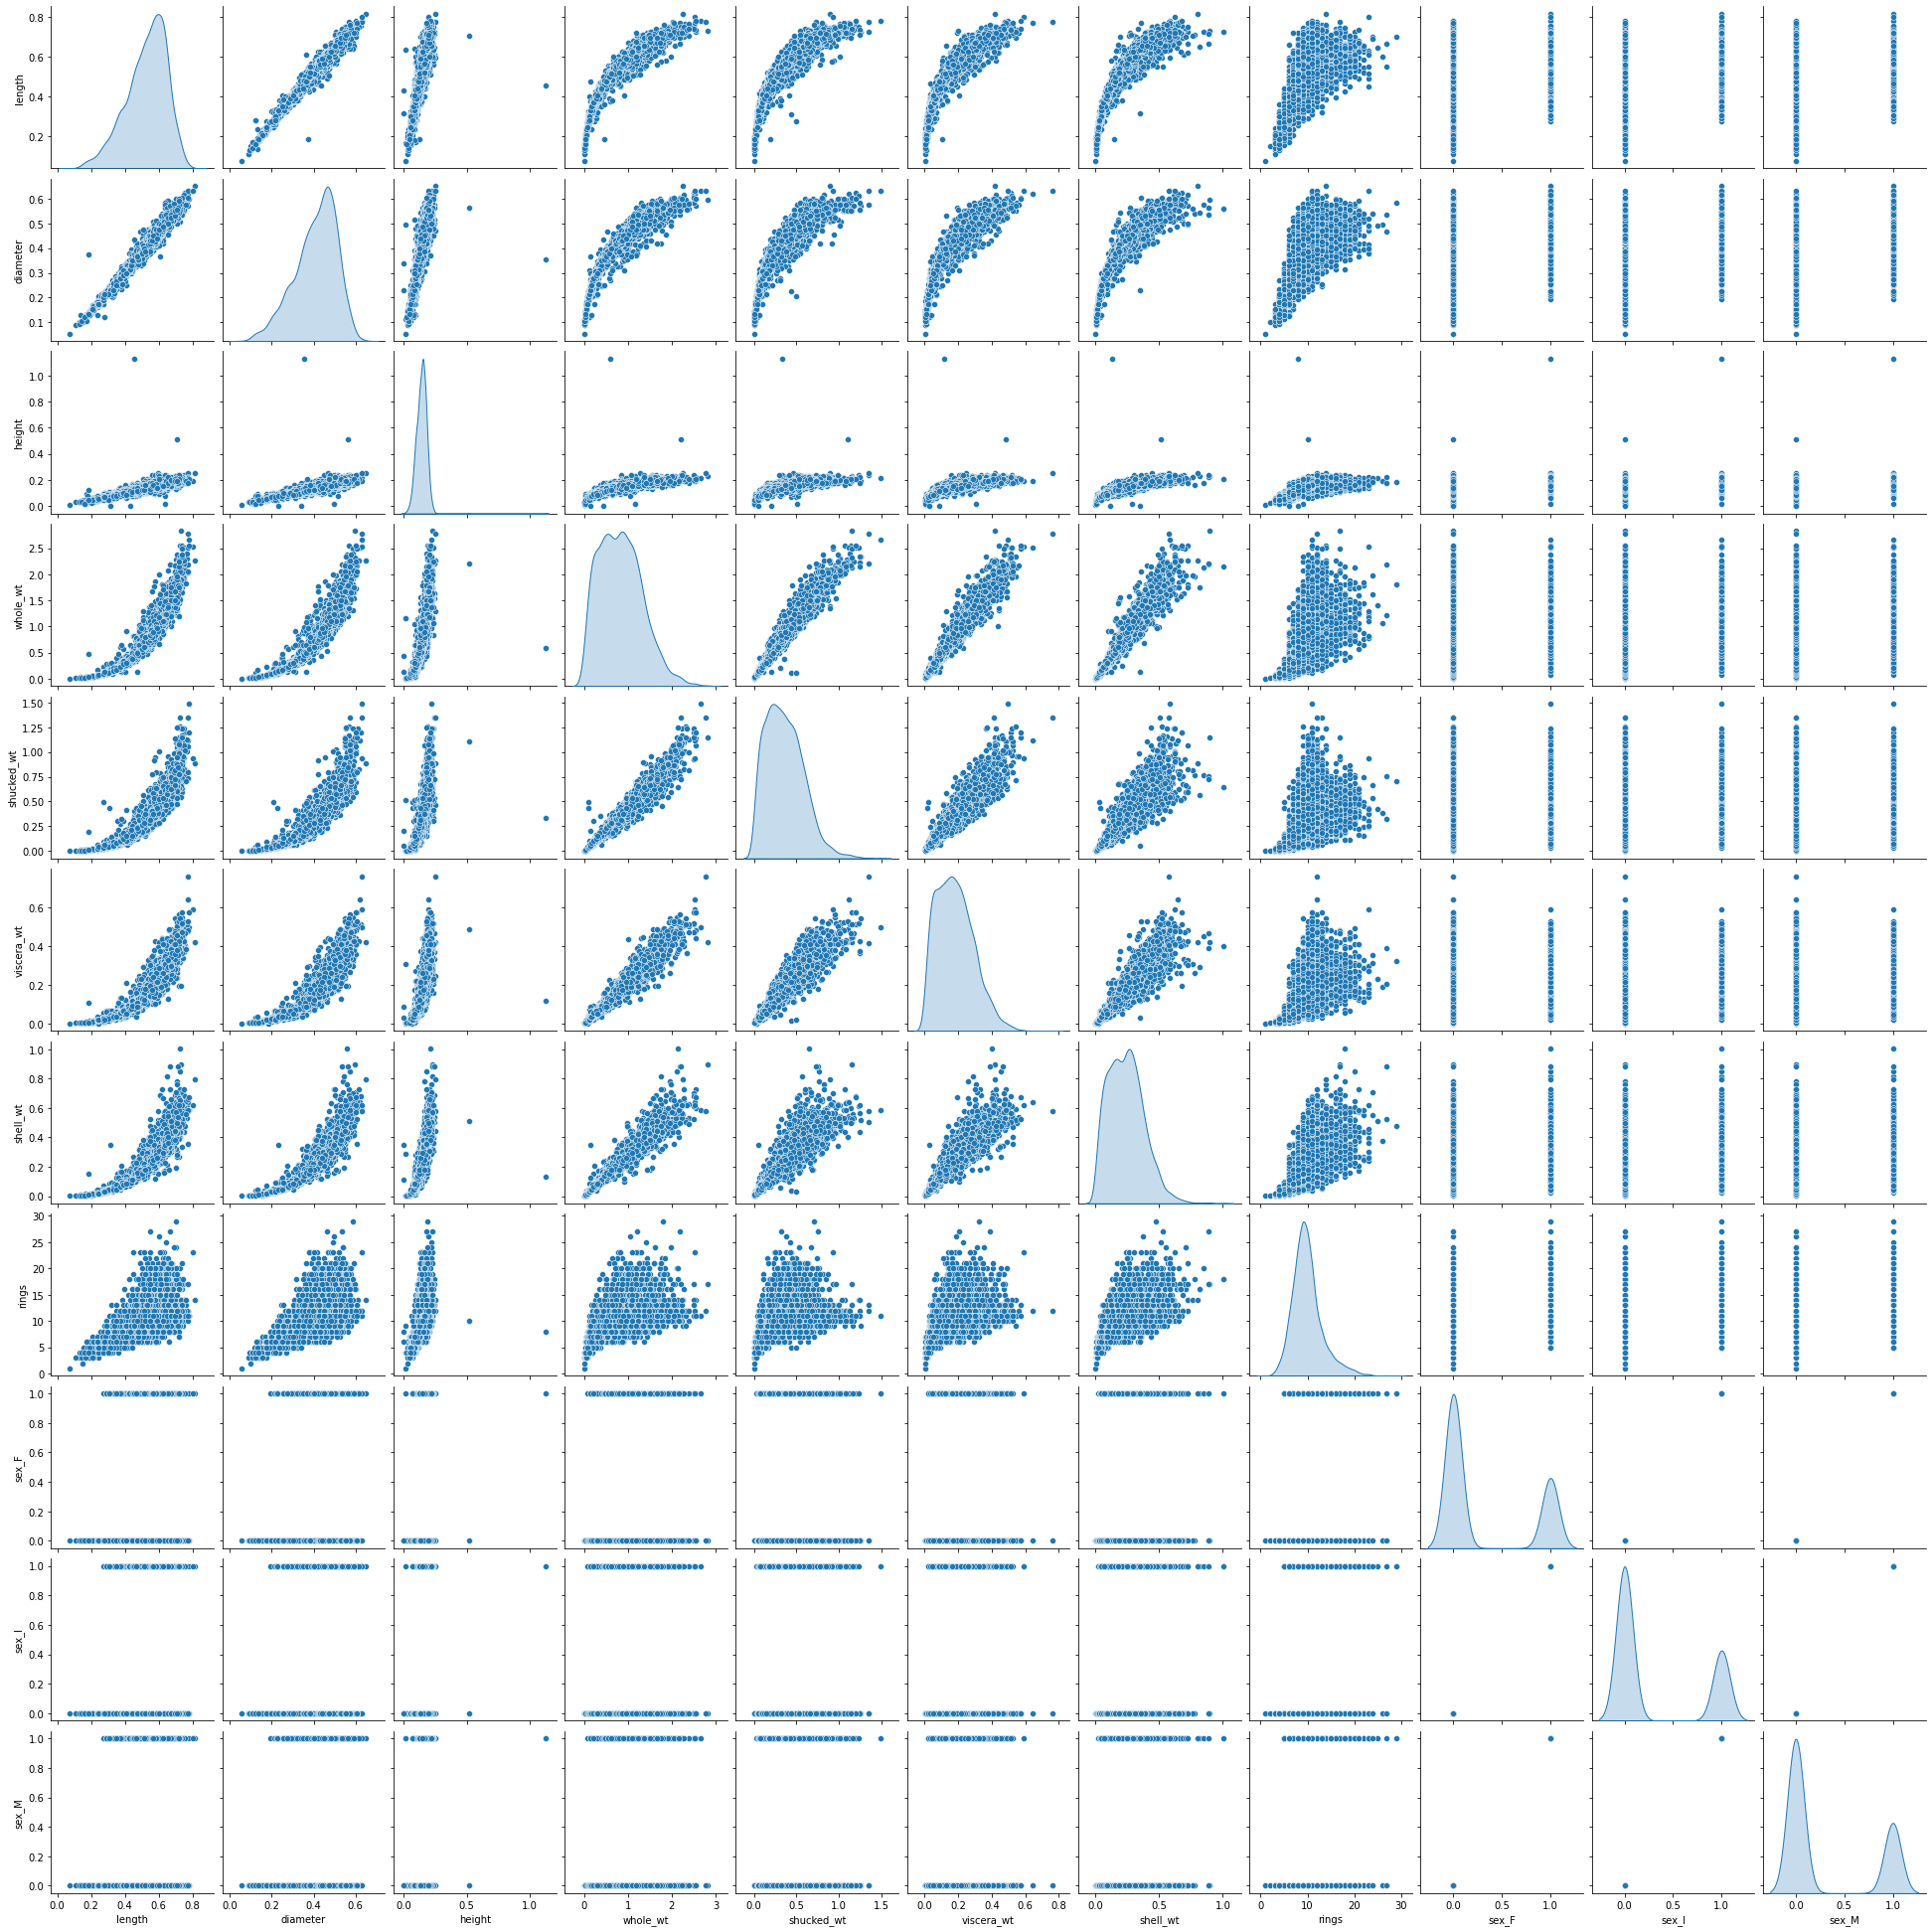

In [89]:
sns.pairplot(df,diag_kind='kde')

#### Tried polynomical features as pair plot shows some variables has curvilinear pattern. But no improvement.

#### It is observed that the variables have long tail and slightly skewed distributions. Also, the dataset is imbalnaced therefore applying lasso distribution.

In [96]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)

print ("Ridge model:", (ridge.coef_))

pred=ridge.predict(X_test)

print("Training Score:",ridge.score(X_train, y_train))
print("Testing Score",ridge.score(X_test, y_test))
print("r2 Score",r2_score(y_test,pred))

Ridge model: [  1.10096022   8.50701396  15.52363914   5.83667825 -16.35177151
  -5.62140497   9.02248896   0.24339213  -0.56950024   0.32610811]
Training Score: 0.5245690437728034
Testing Score 0.5189344669181596
r2 Score 0.5189344669181596


#### Applying PCA:

In [187]:
X = df.drop(['rings'], axis=1)
y = df['rings'].ravel()


from sklearn.decomposition import PCA
pca_ab = PCA(n_components=5)
pca_ab = pca_ab.fit_transform(X)
pca_ab

array([[-6.40163828e-01, -1.51772822e-01, -3.11493531e-03,
        -1.21315040e-02,  7.06944112e-03],
       [-7.68446694e-01, -4.81493104e-01,  2.66001120e-02,
         3.45412843e-02,  1.04849865e-03],
       [ 1.04609720e+00, -5.95825582e-01, -4.42165262e-02,
        -3.04056582e-02,  1.34722547e-03],
       ...,
       [-3.53786621e-01,  5.86529264e-01,  8.75330577e-03,
        -1.42528159e-02, -3.44904967e-02],
       [ 1.23517881e+00, -1.05728889e-01,  3.72170478e-02,
        -5.90432882e-02, -3.66732799e-03],
       [-2.99824137e-02,  1.42652720e+00,  1.24213176e-01,
         3.38663036e-02,  4.19987906e-02]])

In [188]:
X = pca_ab
y = df['rings'].ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

model = XGBRegressor(max_depth=8, n_estimators=300)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.4366364633211197

#### Applying didnot improve performance.

### Avalone as the Classiciation Problem:

In [114]:
df_cat = pd.read_table("abalone.data", sep=",",header=None)
df_cat.columns=['sex','length','diameter','height','whole_wt','shucked_wt','viscera_wt','shell_wt','rings']
df_cat

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [142]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
X = df_cat.drop('sex', axis=1)
y = df_cat['sex']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

#### Decission tree classifier:

In [118]:
from sklearn.tree import DecisionTreeClassifier
temp = DecisionTreeClassifier()
temp = temp.fit(X_train,y_train)
temp
y_pred=temp.predict(X_test)

In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           F       0.42      0.43      0.43       316
           I       0.71      0.65      0.68       350
           M       0.46      0.48      0.47       379

    accuracy                           0.52      1045
   macro avg       0.53      0.52      0.52      1045
weighted avg       0.53      0.52      0.53      1045



In [120]:
# Tuning hyper parameters:

hp_dt=DecisionTreeClassifier(random_state=24)

params_dt = {'max_depth': [3, 4,5, 6],
              'max_features': [1,2,3,4,5,6,7,8,9,10],
              'min_samples_leaf': [0.1, 0.2,0.3]
            }
grid_dt = GridSearchCV(estimator=hp_dt,                        
                       param_grid=params_dt,                       
                       cv=10,                       
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=24),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [0.1, 0.2, 0.3]})

In [121]:
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 4, 'max_features': 3, 'min_samples_leaf': 0.1}


In [127]:
# Model with best parameter for Decission tree:
temp = DecisionTreeClassifier(max_depth=3,max_features=3,min_samples_leaf=0.1)
temp = temp.fit(X_train,y_train)
temp
y_pred=temp.predict(X_test)

In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           F       0.00      0.00      0.00       316
           I       0.58      0.93      0.72       350
           M       0.51      0.64      0.57       379

    accuracy                           0.55      1045
   macro avg       0.36      0.53      0.43      1045
weighted avg       0.38      0.55      0.44      1045



#### Random Forest Classifier:

In [133]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state =42,max_depth=3,max_features=3,min_samples_leaf=0.1)

rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           F       0.43      0.09      0.16       316
           I       0.68      0.81      0.74       350
           M       0.47      0.70      0.57       379

    accuracy                           0.55      1045
   macro avg       0.53      0.54      0.49      1045
weighted avg       0.53      0.55      0.50      1045



#### Xgboost classifier:

In [135]:
from xgboost import XGBClassifier

#fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

[09:15:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           F       0.43      0.41      0.42       316
           I       0.74      0.73      0.74       350
           M       0.47      0.49      0.48       379

    accuracy                           0.55      1045
   macro avg       0.55      0.55      0.55      1045
weighted avg       0.55      0.55      0.55      1045



#### Tuning xgboost parameter:

In [136]:
hp_dt=XGBClassifier(random_state=24)

params_dt = {'max_depth': [3, 4,5, 6],
            'min_child_weight':[1,3,5]
            }
grid_dt = GridSearchCV(estimator=hp_dt,                        
                       param_grid=params_dt,                       
                       cv=10,                       
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)

[09:21:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=24,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, 

In [140]:
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 3, 'min_child_weight': 5}


#### Xgboost with best parameter:

In [141]:
from xgboost import XGBClassifier

#fit model no training data
model = XGBClassifier(random_state=24,max_depth=3,min_child_weight=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

[09:22:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           F       0.43      0.37      0.40       316
           I       0.74      0.80      0.77       350
           M       0.47      0.50      0.48       379

    accuracy                           0.56      1045
   macro avg       0.55      0.55      0.55      1045
weighted avg       0.55      0.56      0.55      1045



#### Max accuracy for model is through xgboost which is 56%.

#### Applying OneVsRestClassifier as this is a multi class classification problem:

In [144]:
from sklearn.svm import LinearSVC

ORC = OneVsRestClassifier(LinearSVC(random_state=24))
ORC.fit(X_train, y_train)
yPred = ORC.predict(X_test)

ORC.score(X_train, y_train)

0.5424648786717752

#### Applying PCA:

In [156]:
X = df_cat.drop('sex', axis=1)
y = df_cat['sex']

from sklearn.decomposition import PCA
pca_ab = PCA(n_components=3)
pca_ab = pca_ab.fit_transform(X)
pca_ab

array([[ 5.00480331, -0.86692655,  0.02787643],
       [-2.99106199, -0.43457164,  0.04114963],
       [-0.94603495, -0.08673867, -0.06333404],
       ...,
       [-0.88806992,  0.5087862 , -0.01368511],
       [ 0.0998919 ,  0.34089986, -0.04164351],
       [ 2.18474351,  1.11378693,  0.09875623]])

In [157]:
X = pca_ab
y = df_cat['sex']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

model = XGBClassifier(random_state=24)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

[09:38:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           F       0.41      0.37      0.39       316
           I       0.71      0.75      0.73       350
           M       0.44      0.46      0.45       379

    accuracy                           0.53      1045
   macro avg       0.52      0.52      0.52      1045
weighted avg       0.52      0.53      0.52      1045

